<a href="https://colab.research.google.com/github/smiledinisa/sk_learn/blob/master/sk_learn002_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/RandomForest

/content/drive/My Drive/RandomForest


# 1 概述：

#1.1 集成算法概述
集成学习（ensemble learning）是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通
过在数据上构建多个模型，集成所有模型的建模结果。基本上所有的机器学习领域都可以看到集成学习的身影，在
现实中集成学习也有相当大的作用，它可以用来做市场营销模拟的建模，统计客户来源，保留和流失，也可用来预
测疾病的风险和病患者的易感性。在现在的各种算法竞赛中，随机森林，梯度提升树（GBDT），Xgboost等集成
算法的身影也随处可见，可见其效果之好，应用之广。

## 集成算法的目标
集成算法会考虑多个评估器的建模结果，汇总之后得到一个综合的结果，以此来获取比单个模型更好的回归或
分类表现。

多个模型集成成为的模型叫做集成评估器（ensemble estimator），组成集成评估器的每个模型都叫做基评估器
（base estimator）。

通常来说，有三类集成算法

装袋法（Bagging）

提升法（Boosting）

和stacking。

![链接文字](https://img-blog.csdnimg.cn/20200821214359206.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

##**装袋法**的核心思想是构建多个相互独立的评估器，然后对其预测进行平均或多数表决原则来决定集成评估器的结果。

## 装袋法的代表模型就是随机森林。

##**提升法**中，基评估器是相关的，是按顺序一一构建的。其核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。提升法的代表模型有Adaboost和梯度提升树。

# 1.2 skleran 中的继承算法


## 集成算法模块： ensemble


![链接文字](https://img-blog.csdnimg.cn/20200821214940222.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)


# 2. RandomForestClassifier 

RandomForestClassifier，随机森林分类
器。

class  sklearn.ensemble.RandomForestClassifier(   
  n_estimators=’10’,  # 指定多少个评估器，然后用这些评估器来进行平均或者少数服从多数。   
  **criterion**=’gini’,  # 不纯度的衡量指标。 ‘geni,entropy'      
  **max_depth**=None,      
  **min_samples_split**=2,   
  **min_samples_leaf**=1,       
  **min_weight_fraction_leaf**=0.0,   
  **max_features**=’auto’,  #默认总特征数开平方取整。   
  **max_leaf_nodes**=None,    
  **min_impurity_decrease**=0.0,   
  **min_impurity_split**=None,   
  **bootstrap**=True,   
  **oob_score**=False,  
  **n_jobs**=None,   
  **random_state**=None,   
  **verbose**=0,   
  **warm_start**=False,   
  **class_weight**=None)     



  大致于决策树一样的参数。

In [ ]:
# 随机数和随机森林进行比较。

%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine


In [ ]:
# 导入数据。
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# 建模决策树。
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(wine.data, wine.target, test_size=0.3)

clf = DecisionTreeClassifier(random_state=30)
rfc = RandomForestClassifier(random_state=30)

clf = clf.fit(xtrain,ytrain)
rfc = rfc.fit(xtrain,ytrain)

score_clf = clf.score(xtest,ytest)
score_rfc = rfc.score(xtest,ytest)

print('Single Tree: {}'.format(score_clf),
      '\nRandom Forest: {}'.format(score_rfc))


Single Tree: 0.9074074074074074 
Random Forest: 0.9814814814814815


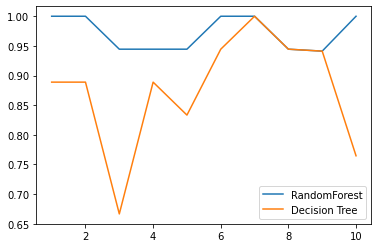

In [ ]:
# 从结果可以看出，效果显然要高一些。

# 画出随机森林和决策树在一组交叉验证下的效果对比。

# 交叉验证，简单来说就检测模型的稳定性。

# 注意，交叉验证验证的是没有训练过的模型，验证的中间就已经进行了训练。

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1,11), rfc_s, label='RandomForest')
plt.plot(range(1,11), clf_s, label='Decision Tree')
plt.legend()
plt.show()  # 从下图的结果可以看出，很显然，随机森林分类的模型更加稳定。

Random Forest:
0.9777777777777779
DecisionTree:
0.8761437908496731


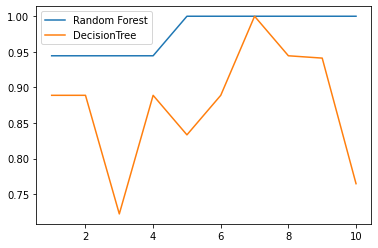

In [ ]:
# 另一种写法。

label = 'Random Forest'
for model in [RandomForestClassifier(n_estimators=25), DecisionTreeClassifier()]:
  score = cross_val_score(model, wine.data, wine.target, cv=10)
  print('{}:'.format(label))
  print(score.mean())
  plt.plot(range(1,11), score, label=label)
  plt.legend()
  label = 'DecisionTree'


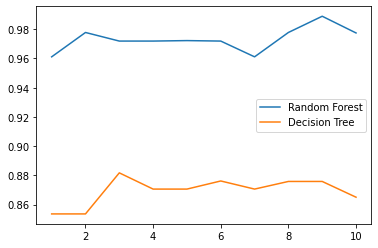

In [ ]:
# 以上的结果只是一组交叉验证。
# 我们如果进行十组交叉验证，每次取平均值。画出相应的图像。

rfc_l = []
clf_l = []

for i in range(10):
  rfc = RandomForestClassifier(n_estimators=25)
  rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()   #每次交叉验证的是个分数取平均。
  rfc_l.append(rfc_s)

  clf = DecisionTreeClassifier()
  clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
  clf_l.append(clf_s)

plt.plot(range(1,11), rfc_l, label='Random Forest')
plt.plot(range(1,11), clf_l, label='Decision Tree')
plt.legend()
plt.show()  #从加过可以看出很明显的稳定性差距。

# n_estimators 参数。

0.9888888888888889 14


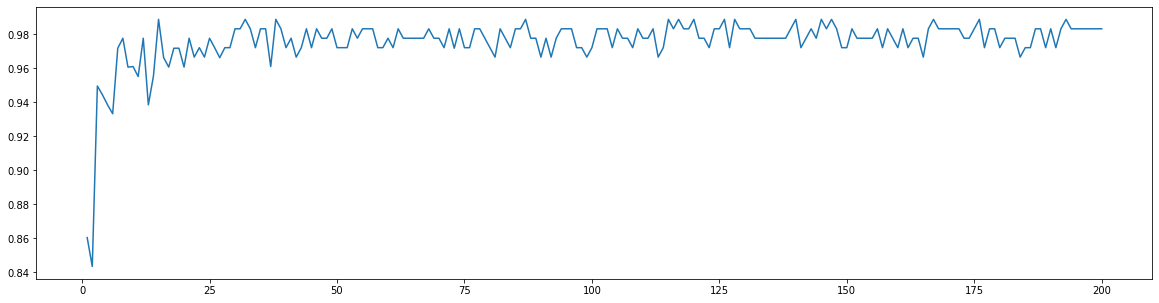

In [ ]:
# n_estimators 的学习曲线，从而找出最优的个数。

superpa = []

for i in range(200):
  rfc = RandomForestClassifier(n_estimators= i+1, n_jobs=-1)  #?？？？n_jobs 参数什么意思？？？ 如果-1 的，按么随机森林将利用cpu所有的核来建树，每个核一个。并行。
  rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
  superpa.append(rfc_s)
  
print(max(superpa), superpa.index(max(superpa)))

plt.figure(figsize=[20,5])
plt.plot(range(1,201), superpa)
plt.show()

# random_state

![链接文字](https://img-blog.csdnimg.cn/20200822163803448.png#pic_center)

In [ ]:
# 随机森林的本质是一种装袋集成算法（bagging），装袋集成算法是对基评估器的预测结果进行平均或用多数表决
# 原则来决定集成评估器的结果。在刚才的红酒例子中，我们建立了25棵树，对任何一个样本而言，平均或多数表决
# 原则下，当且仅当有13棵以上的树判断错误的时候，随机森林才会判断错误。单独一棵决策树对红酒数据集的分类
# 准确率在0.85上下浮动，假设一棵树判断错误的可能性为0.2(ε)，那20棵树以上都判断错误的可能性是：

import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()  #comb 数学C 25取i 个的组合。


0.00036904803455582827

In [ ]:
# 从上结果可以看出，错误率为0.2， 总共25个estimator ，13个以上都判断错才算错，那么判断错误的概率就是0.000036xxxx


# 可见，判断错误的几率非常小，这让随机森林在红酒数据集上的表现远远好于单棵决策树。
# 那现在就有一个问题了：我们说袋装法服从多数表决原则或对基分类器结果求平均，这即是说，我们默认森林中的
# 每棵树应该是不同的，并且会返回不同的结果。设想一下，如果随机森林里所有的树的判断结果都一致（全判断对
# 或全判断错），那随机森林无论应用何种集成原则来求结果，都应该无法比单棵决策树取得更好的效果才对。但我
# 们使用了一样的类DecisionTreeClassifier，一样的参数，一样的训练集和测试集，为什么随机森林里的众多树会有
# 不同的判断结果？
# 问到这个问题，很多小伙伴可能就会想到了：sklearn中的分类树DecisionTreeClassifier自带随机性，所以随机森
# 林中的树天生就都是不一样的。我们在讲解分类树时曾提到，决策树从最重要的特征中随机选择出一个特征来进行
# 分枝，因此每次生成的决策树都不一样，这个功能由参数random_state控制。
# 随机森林中其实也有random_state，用法和分类树中相似，只不过在分类树中，一个random_state只控制生成一
# 棵树，而随机森林中的random_state控制的是生成森林的模式，而非让一个森林中只有一棵树。

In [ ]:
# 决策树的random_state 是控制一棵树。
# 随机森林的random_state 控制生成决策树的模式。

rfc = RandomForestClassifier(n_estimators=20, random_state =2)
rfc = rfc.fit(xtrain,ytrain)

# 用随机森林的属性来查看森林的状态。
rfc.estimators_[0].random_state

1872583848

In [ ]:
for i in range(len(rfc.estimators_)):
  print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [ ]:
# 我们可以观察到，当random_state固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是
# 用”随机挑选特征进行分枝“的方法得到的随机性。并且我们可以证明，当这种随机性越大的时候，袋装法的效果一
# 般会越来越好。用袋装法集成时，基分类器应当是相互独立的，是不相同的。
# 但这种做法的局限性是很强的，当我们需要成千上万棵树的时候，数据不一定能够提供成千上万的特征来让我们构
# 筑尽量多尽量不同的树。因此，除了random_state。我们还需要其他的随机性。

# bootstrap & oob_score

# bootstrap 控制抽样技术的参数，每次构造树的时候，使用不同的训练集来进行训练和构造。

# 在一个含有n个样本的原始训练集中，我们进行随机采样，每次采样一个样本，并在抽取下一个样本之前将该样本
#放回原始训练集，也就是说下次采样时这个样本依然可能被采集到，这样采集n次，最终得到一个和原始训练集一
#样大的，n个样本组成的自助集。由于是随机采样，这样每次的自助集和原始数据集不同，和其他的采样集也是不
#同的。这样我们就可以自由创造取之不尽用之不竭，并且互不相同的自助集，用这些自助集来训练我们的基分类
#器，我们的基分类器自然也就各不相同了。

# 这样在样本本身不变的情况下，通过允许重复样本出现的方法，达到了样本集的扩充，使得每次构造的基分类器不同，使得随机树性能提升。


![链接文字](https://img-blog.csdnimg.cn/20200822170224253.png#pic_center)

#然而有放回抽样也会有自己的问题。由于是有放回，一些样本可能在同一个自助集中出现多次，而其他一些却可能
#被忽略，一般来说，自助集大约平均会包含63%的原始数据。因为每一个样本被抽到某个自助集中的概率为：
#当n足够大时，

#这个概率收敛于**1-(1/e)，约等于0.632**。 

# 因此，会有约37%的训练数据被浪费掉，没有参与建模，
#这些数据被称为袋外数据(out of bag data，简写为oob)。除了我们最开始就划分好的测试集之外，这些数据也可
#以被用来作为集成算法的测试集。也就是说，在使用随机森林时，我们可以不划分测试集和**训练集，只需要用袋外**
#**数据来测试我们的模型即可**。当然，这也不是绝对的，当n和n_estimators都不够大的时候，很可能就没有数据掉
#落在袋外，自然也就无法使用oob数据来测试模型了

# oob_score 这个参数 out of bag score 如果为True,表示用袋外模型来进行测试模型。

#之后用 oob_score_ 属性来查看测试结果。

In [ ]:
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)


rfc.oob_score_

0.9662921348314607

# 2 重要的属性和接口。

#传统的随机森林是利用袋装法中的规则，平均或少数服从多数来决定集成的结果，而sklearn中的随机森林是平均
#每个样本对应的predict_proba返回的概率，得到一个平均概率，从而决定测试样本的分类

In [ ]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)


0.9814814814814815

In [ ]:
rfc.feature_importances_ #各个属性的重要性。

array([0.15521064, 0.04048216, 0.00889554, 0.01669016, 0.01968047,
       0.05701973, 0.15302827, 0.01511682, 0.02078997, 0.11655352,
       0.05724482, 0.14214061, 0.19714728])

In [ ]:
rfc.apply(xtest) # 返回所在的索引。

array([[14,  3,  8, ...,  2,  5,  5],
       [ 7,  6,  3, ...,  9,  4,  2],
       [22,  9, 25, ..., 12,  8, 10],
       ...,
       [12,  1,  4, ..., 15,  1,  8],
       [14,  3,  8, ...,  2,  5,  5],
       [14,  3,  4, ...,  2,  5,  5]])

In [ ]:
rfc.predict(xtest) #返回预测标签。


array([1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1])

In [ ]:
rfc.predict_proba(xtest) #返回各个标签的概率，全部返回。

array([[0.  , 0.96, 0.04],
       [0.04, 0.16, 0.8 ],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.16, 0.8 , 0.04],
       [0.  , 0.4 , 0.6 ],
       [0.  , 0.  , 1.  ],
       [0.92, 0.08, 0.  ],
       [0.08, 0.92, 0.  ],
       [0.04, 0.92, 0.04],
       [0.64, 0.28, 0.08],
       [0.  , 0.  , 1.  ],
       [0.64, 0.32, 0.04],
       [0.8 , 0.2 , 0.  ],
       [0.08, 0.88, 0.04],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.84, 0.16, 0.  ],
       [0.  , 0.04, 0.96],
       [0.08, 0.24, 0.68],
       [0.  , 0.56, 0.44],
       [0.08, 0.92, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.16, 0.8 ],
       [0.  , 0.12, 0.88],
       [0.08, 0.16, 0.76],
       [0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.08],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
 

#Bonus：Bagging的另一个必要条件

# 要求基分类器的准确率必须达到50以上。这也是一个必要条件。



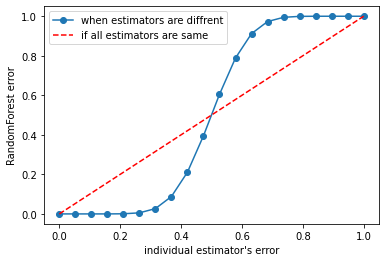

In [ ]:
import numpy as np
from scipy.special import comb

# 计算25个随机数的森林，各个错误率，综合后的随机森林错误率。

x = np.linspace(0,1,20)
y = []

for epsilon in np.linspace(0,1,20):
  e = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
  y.append(e)
  
plt.plot(x,y,'o-', label='when estimators are diffrent')
plt.plot(x,x,'--', color='red', label='if all estimators are same')
plt.xlabel("individual estimator's error")
plt.ylabel('RandomForest error')
plt.legend()
plt.show()

# 从上图可以看出，只有当基分类器的误差小于50%时候，随机森林才会有效的降低误差提高准确率，否则随机森林失去意义。


# 所以在使用随机森连前，必须保证基分类器可以达到50%以上的准确率。

# 3.RandomForestRegressor 随机回归森林

class  sklearn.ensemble.RandomForestRegressor (

  
  n_estimators=’warn’, 

  criterion=’mse’, 

  max_depth=None,

min_samples_split=2,

 min_samples_leaf=1, 

 min_weight_fraction_leaf=0.0, 

 max_features=’auto’,

max_leaf_nodes=None,

 min_impurity_decrease=0.0,
 
  min_impurity_split=None,
  
   bootstrap=True, 
   
   oob_score=False,


n_jobs=None, 

random_state=None, 

verbose=0, 

warm_start=False)


所有的参数，属性与接口，全部和随机森林分类器一致。仅有的不同就是回归树与分类树的不同，不纯度的指标，
参数Criterion不一致

In [ ]:
from sklearn.datasets import load_boston
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring = "neg_mean_squared_error")
sorted(sklearn.metrics.SCORERS.keys()) #打印scoring可以取的关键字。

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

#3.2 实例：用随机森林回归填补缺失值

### **在sklearn中，我们可以使用sklearn.impute.SimpleImputer来轻松地将均值，中值，或者其他最常用的数值填补到数据中，在这个案例中，我们将使用均值，0，和随机森林回归来填补缺失值，并验证四种状况下的拟合状况，找出对使用的数据集来说最佳的缺失值填补方法。**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer # 填充。 impute 归罪于。
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score



In [4]:
# 以波士顿数据为例，导入完整的数据集并进行探索。
dataset = load_boston()
dataset.data.shape

(506, 13)

In [6]:
x_full, y_full = dataset.data, dataset.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]
# 样本数和特征数。

In [7]:
n_samples

506

In [8]:
# 为完整的数据放入缺失值。
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
# 我们以百分之50的概率来进行na值填充。
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples*n_features*missing_rate)) # 抽样的个数。

In [9]:
missing_features = rng.randint(0, n_features, n_missing_samples)
missing_samples = rng.randint(0, n_samples, n_missing_samples)
# 横坐标和纵坐标相应对应起来就组成了n_missing_samples 个点。当然，这些点可能是重复的。
# 如果抽样的个数远远小于行数或者列数，可以使用

# missing_features = rng.choice(dataset.data.shpa[1], n_mising_samples, replace = False)
# 这样可以不重复抽样。

x_missing = x_full.copy()
y_missing = y_full.copy()

x_missing[missing_samples, missing_features] = np.nan

x_missing = pd.DataFrame(x_missing)
x_missing #需要用索引操作的时候用pandas，需要用矩阵操作的时候用np

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [10]:
# 使用0和均值填补空缺值。

In [12]:
# 问题，这里使用pandas 函数进行填补操作是否也可以？？/
# 使用均值进行填补。
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_missing_mean = imp_mean.fit_transform(x_missing)
x_missing_mean

array([[3.62757895e+00, 1.80000000e+01, 1.11634641e+01, ...,
        1.85211921e+01, 3.52741952e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 1.11634641e+01, ...,
        1.85211921e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 1.07229508e+01, 7.07000000e+00, ...,
        1.85211921e+01, 3.52741952e+02, 1.29917666e+01],
       ...,
       [3.62757895e+00, 1.07229508e+01, 1.19300000e+01, ...,
        2.10000000e+01, 3.52741952e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.85211921e+01, 3.96900000e+02, 7.88000000e+00]])

In [13]:
x_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [19]:
x_missing.mean()

0       3.627579
1      10.722951
2      11.163464
3       0.066007
4       0.564128
5       6.305921
6      67.400000
7       3.856371
8       9.383871
9     405.935275
10     18.521192
11    352.741952
12     12.991767
dtype: float64

In [30]:

df = x_missing.fillna(value=x_missing.mean(), axis=0) #这样也是可以的。
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.627579,18.000000,11.163464,0.066007,0.538000,6.305921,65.2,4.090000,1.000000,296.000000,18.521192,352.741952,4.980000
1,0.027310,0.000000,11.163464,0.000000,0.469000,6.305921,78.9,4.967100,2.000000,405.935275,18.521192,396.900000,9.140000
2,0.027290,10.722951,7.070000,0.000000,0.564128,7.185000,61.1,3.856371,2.000000,242.000000,18.521192,352.741952,12.991767
3,3.627579,10.722951,11.163464,0.000000,0.458000,6.305921,45.8,3.856371,9.383871,222.000000,18.700000,352.741952,12.991767
4,3.627579,0.000000,2.180000,0.000000,0.564128,7.147000,67.4,3.856371,9.383871,405.935275,18.700000,352.741952,5.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.627579,10.722951,11.163464,0.000000,0.573000,6.305921,69.1,3.856371,1.000000,405.935275,21.000000,352.741952,9.670000
502,0.045270,0.000000,11.930000,0.000000,0.573000,6.120000,76.7,2.287500,1.000000,273.000000,18.521192,396.900000,9.080000
503,3.627579,10.722951,11.930000,0.066007,0.573000,6.976000,91.0,3.856371,9.383871,405.935275,21.000000,352.741952,5.640000
504,0.109590,0.000000,11.930000,0.066007,0.573000,6.305921,89.3,3.856371,1.000000,405.935275,21.000000,393.450000,6.480000


In [35]:
df.values ##或者可以。
np.array(df) == x_missing_mean # 可以看出两个效果是相同的。

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [15]:
x_missing.fillna?
Signature: x_missing.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None) -> Union[_ForwardRef('DataFrame'), NoneType]
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values.
inplace : bool, default False
    If True, fill in-place. Note: this will modify any
    other views on this object (e.g., a no-copy slice for a column in a
    DataFrame).
limit : int, default None
    If method is specified, this is the maximum number of consecutive
    NaN values to forward/backward fill. In other words, if there is
    a gap with more than this number of consecutive NaNs, it will only
    be partially filled. If method is not specified, this is the
    maximum number of entries along the entire axis where NaNs will be
    filled. Must be greater than 0 if not None.
downcast : dict, default is None
    A dict of item->dtype of what to downcast if possible,
    or the string 'infer' which will try to downcast to an appropriate
    equal type (e.g. float64 to int64 if possible).

In [21]:
# 进行0 值填补

imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
x_missing_0 = imp_0.fit_transform(x_missing)
x_missing_0

array([[0.0000e+00, 1.8000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 0.0000e+00,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 0.0000e+00, 3.9690e+02,
        7.8800e+00]])

In [36]:
# 也可以使用dataframe.fillna 
df2 = x_missing.fillna(0)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.00,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.00,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.00,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.00,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,0.00,0.0,0.573,0.000,69.1,0.0000,1.0,0.0,21.0,0.00,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,0.0,396.90,9.08
503,0.00000,0.0,11.93,0.0,0.573,6.976,91.0,0.0000,0.0,0.0,21.0,0.00,5.64
504,0.10959,0.0,11.93,0.0,0.573,0.000,89.3,0.0000,1.0,0.0,21.0,393.45,6.48


In [37]:
df2.values == x_missing_0

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [39]:
# 使用随机森林填补缺失值。

# 思想： 

# """
# 使用随机森林回归填补缺失值
# 任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，是因为回归算法认为，特征
# 矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，比如说，在一个“用地区，环境，附近学校数
# 量”预测“房价”的问题中，我们既可以用“地区”，“环境”，“附近学校数量”的数据来预测“房价”，也可以反过来，
# 用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利用了这种思想。
# 对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新
# 的特征矩阵。那对于T来说，它没有缺失的部分，就是我们的Y_test，这部分数据既有标签也有特征，而它缺失的部
# 分，只有特征没有标签，就是我们需要预测的部分。
# 特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train
# 特征T不缺失的值：Y_train
# 特征T缺失的值对应的其他n-1个特征 + 本来的标签：X_test
# 特征T缺失的值：未知，我们需要预测的Y_test
# 这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。
# 那如果数据中除了特征T之外，其他特征也有缺失值怎么办？
# 答案是遍历所有的特征，从缺失最少的开始进行填补（因为填补缺失最少的特征所需要的准确信息最少）。
# 填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填
# 补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。当
# 进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何的其他特征需要用0来进行填补了，
# 而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。
# 遍历所有的特征后，数据就完整，不再有缺失值了。
# """

# 简单来说就是，将缺失的特征当作label，其他特征当作特征，来根据缺失特征的未缺失部分进行训练，然后预测缺失部分的特征。
# 如果多个特征都有缺失，那么从缺失最少的开始进行预测，其他缺失的特征用0填补。逐次填补，最优使得数据完整。

In [40]:
# 使用随机森林回归进行填补特征缺失。

# 填补x_missing；

x_missing_reg = x_missing.copy()
sortindex = np.argsort(x_missing_reg.isnull().sum(axis=0)).values
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11])

In [42]:
# 先对nan进行判断，然后统计每个特征下的nan个数，然后进行排序，转换未array

# 从小到大排序的索引，然后以这些索引逐个对其进行填补。

for i in sortindex:
  #当前标签当作目标label，其他当作特征。
  df = x_missing_reg
  fillc = df.iloc[:,i]
  df = pd.concat([df.iloc[:, df.columns != i], pd.DataFrame(y_full)], axis=1) # 将其他特征与 房价进行链接，组成新的特征。

#对其他特征的缺失值进行填补0
  df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
  
  #找出训练集，测试，以及相应的标签。
  ytrain = fillc[fillc.notnull()]
  ytest = fillc[fillc.isnull()]
  xtrain = df_0[ytrain.index,:]
  xtest = df_0[ytest.index,:]


  # 用随机森林进行回归预测，并用预测值进行填补。

  rfc = RandomForestRegressor(n_estimators=100)
  rfc = rfc.fit(xtrain,ytrain)
  ypredict = rfc.predict(xtest)


  x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(), i] = ypredict


In [43]:
x_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.337443,18.00,7.6064,0.07,0.538000,6.84673,65.200,4.090000,1.00,296.00,18.387,389.7079,4.9800
1,0.027310,0.00,5.1711,0.00,0.469000,6.18008,78.900,4.967100,2.00,299.04,18.916,396.9000,9.1400
2,0.027290,14.94,7.0700,0.00,0.465977,7.18500,61.100,4.341232,2.00,242.00,18.035,389.2240,4.9998
3,0.087602,21.88,2.9385,0.00,0.458000,6.98303,45.800,4.861065,3.65,222.00,18.700,393.3800,5.5440
4,0.094228,0.00,2.1800,0.00,0.458383,7.14700,55.636,4.876709,4.10,271.43,18.700,391.6863,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.503880,2.77,10.6204,0.00,0.573000,6.25740,69.100,3.060266,1.00,288.19,21.000,390.4912,9.6700
502,0.045270,0.00,11.9300,0.00,0.573000,6.12000,76.700,2.287500,1.00,273.00,18.792,396.9000,9.0800
503,0.542169,0.71,11.9300,0.18,0.573000,6.97600,91.000,2.685474,4.13,308.69,21.000,389.7353,5.6400
504,0.109590,0.00,11.9300,0.08,0.573000,6.38339,89.300,2.885011,1.00,258.74,21.000,393.4500,6.4800


In [45]:
# 对填补的数据进行建模。

x = [x_full, x_missing_mean,x_missing_0,x_missing_reg]

mse = []
std = []

for x in x:
  estimator = RandomForestRegressor(random_state=0, n_estimators=100)
  scores = cross_val_score(estimator, x, y_full, scoring='neg_mean_squared_error', cv=5).mean()
  mse.append(scores*-1)

  

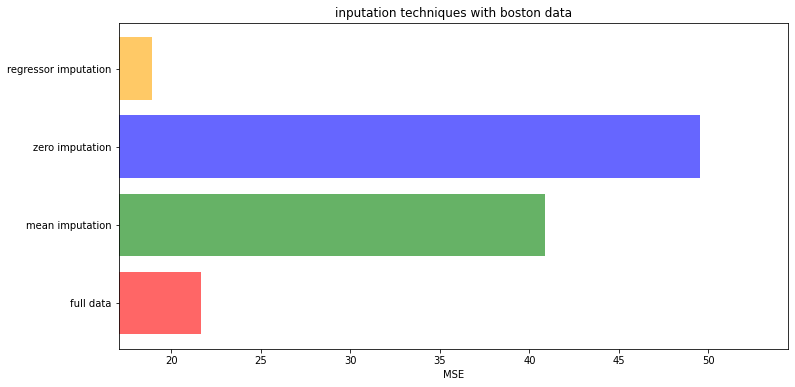

In [48]:
# 用所得的mse来画图。

x_labels = ['full data',
            'mean imputation',
            'zero imputation',
            'regressor imputation']

colors = ['r', 'g', 'b', 'orange']

plt.figure(figsize=(12,6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
  ax.barh(i, mse[i], color=colors[i], alpha=0.6, align='center') #bar h 水平bar
ax.set_title('inputation techniques with boston data')
ax.set_xlim(left=np.min(mse)*0.9, right=np.max(mse)*1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

In [ ]:
# 从结果可以看出，使用随机森林来进行空值填补，结果更加接近真实效果。

# 机器学习中的调参的基本思想：

![链接文字](https://img-blog.csdnimg.cn/20200823204842106.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

![链接文字](https://img-blog.csdnimg.cn/20200823204852727.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

![链接文字](https://img-blog.csdnimg.cn/20200823204902860.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

![链接文字](https://img-blog.csdnimg.cn/20200823204928316.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

![链接文字](https://img-blog.csdnimg.cn/20200823204936116.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

![链接文字](https://img-blog.csdnimg.cn/20200823204945754.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

![链接文字](https://img-blog.csdnimg.cn/20200823204954791.png#pic_center)